In [3]:
import os
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
import json

In [4]:
PATH_TO_OCS = "/home/ign.fr/skhelifi/data/ocsge-samy/vector-gt"
OCCUPATION = "OCCUPATION_SOL.shp"
ZONE_CONSTRUITE = "ZONE_CONSTRUITE.shp"

In [60]:
def find_shape_file_by_dep(root):
    
    d={}
    for root, dirs, files in os.walk(root, topdown=False):
        
        for name in files:
        
            if name == "OCCUPATION_SOL.shp":
            
                key = root.split("/")[-1].replace("-", "_")
                d[key] = {} if key not in d.keys() else d[key]
                d[key]["OCCUPATION_SOL"] = os.path.join(root, name)
                d[key]["ZONE_CONSTRUITE"] = os.path.join(root, "ZONE_CONSTRUITE.shp")
                d[key]["PVA"] = key.split("_")[-1]
                d[key]["DEP"] = key.split("_")[-2][1:]
                d[key]["OCS_ID"] = key
            
            if name == "EMPRISE.shp":
                
                key = root.split("/")[-2].replace("-", "_")
                d[key] = {} if key not in d.keys() else d[key]
                d[key]["EMPRISE"] = os.path.join(root, name)
                
                
                
    return d

d = find_shape_file_by_dep(PATH_TO_OCS)  

for key, value in d.items():
    
    print(f"key: {key} \n EMPRISE: {value['EMPRISE']} \n\
    OCCUPATION_SOL: {value['OCCUPATION_SOL']} \n ZONE_CONSTRUITE: {value['ZONE_CONSTRUITE']}\
    \n PVA: {value['PVA']} \n DEP: {value['DEP']} \n id: {value['OCS_ID']}")
    


key: OCSGE_1_1_SHP_LAMB93_D66_2015 
 EMPRISE: /home/ign.fr/skhelifi/data/ocsge-samy/vector-gt/OCS_GE_1-1_2015_SHP_LAMB93_D066_2019-09-06.7z/OCS_GE_1-1_2015_SHP_LAMB93_D066_2019-09-06/OCS_GE/3_SUPPLEMENTS_LIVRAISON_2019-09-00096/OCSGE_1-1_SHP_LAMB93_D66_2015/EMPRISE/EMPRISE.shp 
    OCCUPATION_SOL: /home/ign.fr/skhelifi/data/ocsge-samy/vector-gt/OCS_GE_1-1_2015_SHP_LAMB93_D066_2019-09-06.7z/OCS_GE_1-1_2015_SHP_LAMB93_D066_2019-09-06/OCS_GE/1_DONNEES_LIVRAISON_2019-09-00096/OCSGE_1-1_SHP_LAMB93_D66_2015/OCCUPATION_SOL.shp 
 ZONE_CONSTRUITE: /home/ign.fr/skhelifi/data/ocsge-samy/vector-gt/OCS_GE_1-1_2015_SHP_LAMB93_D066_2019-09-06.7z/OCS_GE_1-1_2015_SHP_LAMB93_D066_2019-09-06/OCS_GE/1_DONNEES_LIVRAISON_2019-09-00096/OCSGE_1-1_SHP_LAMB93_D66_2015/ZONE_CONSTRUITE.shp    
 PVA: 2015 
 DEP: 66 
 id: OCSGE_1_1_SHP_LAMB93_D66_2015
key: OCSGE_1_1_SHP_LAMB93_D2A_2016 
 EMPRISE: /home/ign.fr/skhelifi/data/ocsge-samy/vector-gt/OCS_GE_1-1_2016_SHP_LAMB93_D02A_2019-04-16.7z/OCS_GE_1-1_2016_SHP_LAMB93

In [61]:
def stack_dep(d, folder, key_data):
    
    gdf = None
    
    for key, value in d.items():
        
        shp = value[key_data]
        actu_gdf = gpd.read_file(shp)
        extra_cols = ["PVA", "DEP", "OCS_ID"]
        extra_vals = [value["PVA"], value["DEP"], value["OCS_ID"]]
        actu_gdf[extra_cols] = pd.DataFrame([extra_vals], index=actu_gdf.index)
        gdf = pd.concat([gdf, actu_gdf]) if gdf is not None else actu_gdf
    
    gdf.to_file(os.path.join(folder, key_data + '-global.gpkg'), driver="GPKG")
    
    return gdf


In [106]:
import json

with open('/home/ign.fr/skhelifi/data/ocsge-samy/data.json', 'w') as fp:
    json.dump(d, fp)

In [95]:
gdf_emprise = stack_dep(d, PATH_TO_OCS, 'EMPRISE')

In [65]:
# gdf_emprise = stack_dep(d, PATH_TO_OCS, 'OCCUPATION_SOL')

In [96]:
gdf_bati = stack_dep(d, PATH_TO_OCS, 'ZONE_CONSTRUITE')

In [66]:
CODE_OCS = {"": "", "": ""}

### Statistiques répartition spatiale

In [91]:
gdf_emprise["area"] = gdf_emprise["geometry"].area
PAYS_DE_LA_LOIRE = ["44", "49", "53", "72", "85"]
gdf_emprise["PAYS_DE_LA_LOIRE"] = gdf_emprise["DEP"].apply(lambda x: "pays de la loire" if x in PAYS_DE_LA_LOIRE else "autres départements")
gdf_emprise[gdf_emprise["PAYS_DE_LA_LOIRE"] == "pays de la loire"]

ID MILLESIME  \
0      ZONEC0000000000004770115      2013   
1      ZONEC0000000000004770116      2013   
2      ZONEC0000000000004770117      2013   
3      ZONEC0000000000004770118      2013   
4      ZONEC0000000000004770119      2013   
...                         ...       ...   
21009  ZONEC0000000000004770106      2013   
21010  ZONEC0000000000004770107      2013   
21011  ZONEC0000000000004770108      2013   
21012  ZONEC0000000000004770109      2013   
21013  ZONEC0000000000004770110      2013   

                                                geometry   PVA DEP  \
0      POLYGON ((407108.780 6659881.450, 407117.860 6...  2013  49   
1      POLYGON ((406606.430 6659966.060, 406599.590 6...  2013  49   
2      POLYGON ((405818.870 6659937.760, 405826.630 6...  2013  49   
3      POLYGON ((404879.550 6660307.910, 404967.330 6...  2013  49   
4      POLYGON ((404223.860 6660398.320, 404230.630 6...  2013  49   
...                                                  ...   ...  ..   
21009  POLYGON ((376875.010 6672367.570, 376823.760 6...  2013  85   
21010  POLYGON ((375183.320 6672401.400, 375155.710 6...  2013  85   
21011  POLYGON ((376239.400 6672644.400, 376262.390 6...  2013  85   
21012  POLYGON ((376044.950 6672760.340, 376043.550 6...  2013  85   
21013  POLYGON ((376786.900 6672794.370, 376801.010 6...  2013  85   

                              OCS_ID          area  PAYS_DE_LA_LOIRE  
0      OCSGE_1_1_SHP_LAMB93_D49_2013  5.001449e+03  pays de la loire  
1      OCSGE_1_1_SHP_LAMB93_D49_2013  5.201775e+03  pays de la loire  
2      OCSGE_1_1_SHP_LAMB93_D49_2013  1.283835e+04  pays de la loire  
3      OCSGE_1_1_SHP_LAMB93_D49_2013  8.074630e+04  pays de la loire  
4      OCSGE_1_1_SHP_LAMB93_D49_2013  4.074334e+04  pays de la loire  
...                              ...           ...               ...  
21009  OCSGE_1_1_SHP_LAMB93_D85_2013  9.743980e+03  pays de la loire  
21010  OCSGE_1_1_SHP_LAMB93_D85_2013  9.366118e+03  pays de la loire  
21011  OCSGE_1_1_SHP_LAMB93_D85_2013  1.096439e+04  pays de la loire  
21012  OCSGE_1_1_SHP_LAMB93_D85_2013  1.672270e+04  pays de la loire  
21013  OCSGE_1_1_SHP_LAMB93_D85_2013  1.952205e+06  pays de la loire  

[138495 rows x 8 columns]

<AxesSubplot:ylabel='area'>

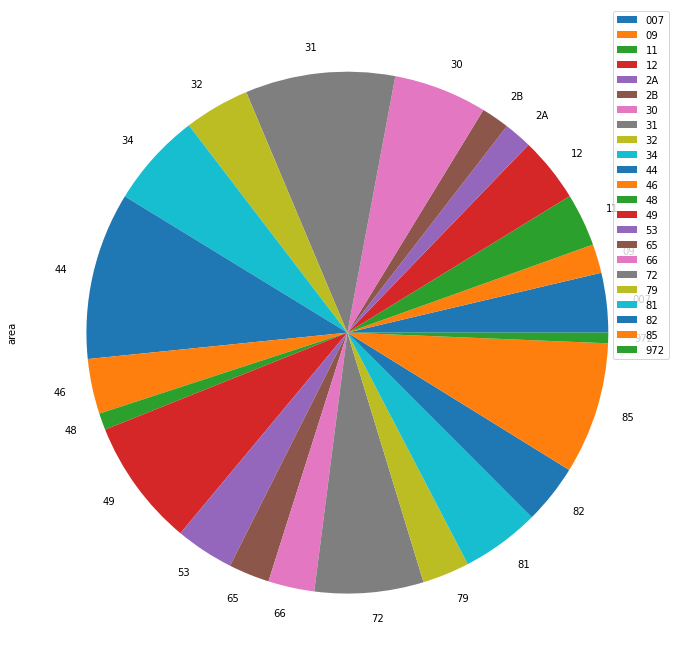

In [92]:
grouped_by_dep_gdf = pd.DataFrame(gdf_emprise.groupby(["DEP"]).sum(["area"]))
grouped_by_dep_gdf.plot(kind='pie', y='area', figsize=(12, 12))

<AxesSubplot:title={'center':'repartition en surface pays de la loire / autres départements'}, ylabel='area'>

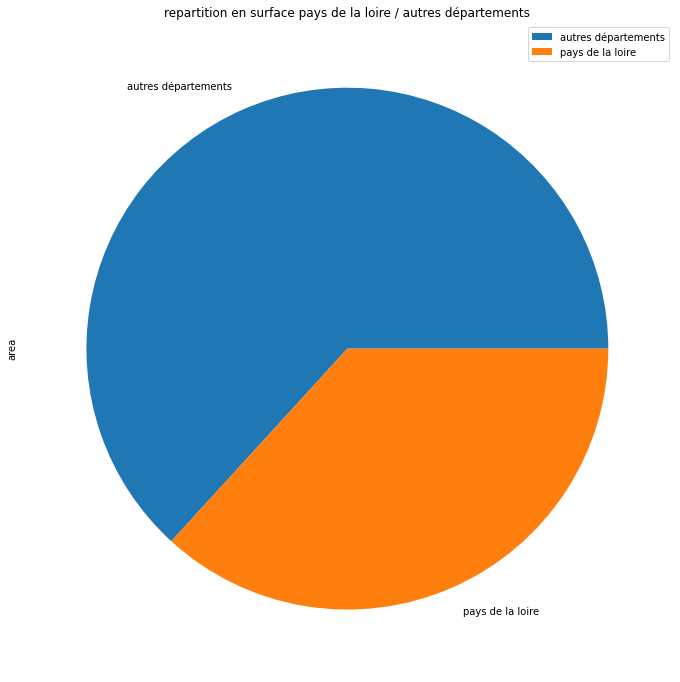

In [93]:
grouped_by_dep_gdf = pd.DataFrame(gdf_emprise.groupby(["PAYS_DE_LA_LOIRE"]).sum(["area"]))
grouped_by_dep_gdf.plot(kind='pie', y='area', figsize=(12, 12), title= "repartition en surface pays de la loire / autres départements")

<AxesSubplot:title={'center':'répartition de la surface annotée par année'}, ylabel='area'>

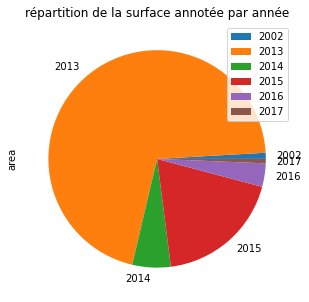

In [94]:
grouped_by_dep_gdf = pd.DataFrame(gdf_emprise.groupby(["PVA"]).sum(["area"]))
grouped_by_dep_gdf.plot(kind='pie', y='area', figsize=(5, 5), title="répartition de la surface annotée par année")

### Statistiques zones construites

In [97]:
gdf_bati["area"] = gdf_bati["geometry"].area
gdf_bati["PAYS_DE_LA_LOIRE"] = gdf_bati["DEP"].apply(lambda x: "pays de la loire" if x in PAYS_DE_LA_LOIRE else "autres départements")
gdf_bati[gdf_bati["PAYS_DE_LA_LOIRE"] == "pays de la loire"]

ID MILLESIME  \
0      ZONEC0000000000004770115      2013   
1      ZONEC0000000000004770116      2013   
2      ZONEC0000000000004770117      2013   
3      ZONEC0000000000004770118      2013   
4      ZONEC0000000000004770119      2013   
...                         ...       ...   
21009  ZONEC0000000000004770106      2013   
21010  ZONEC0000000000004770107      2013   
21011  ZONEC0000000000004770108      2013   
21012  ZONEC0000000000004770109      2013   
21013  ZONEC0000000000004770110      2013   

                                                geometry   PVA DEP  \
0      POLYGON ((407108.780 6659881.450, 407117.860 6...  2013  49   
1      POLYGON ((406606.430 6659966.060, 406599.590 6...  2013  49   
2      POLYGON ((405818.870 6659937.760, 405826.630 6...  2013  49   
3      POLYGON ((404879.550 6660307.910, 404967.330 6...  2013  49   
4      POLYGON ((404223.860 6660398.320, 404230.630 6...  2013  49   
...                                                  ...   ...  ..   
21009  POLYGON ((376875.010 6672367.570, 376823.760 6...  2013  85   
21010  POLYGON ((375183.320 6672401.400, 375155.710 6...  2013  85   
21011  POLYGON ((376239.400 6672644.400, 376262.390 6...  2013  85   
21012  POLYGON ((376044.950 6672760.340, 376043.550 6...  2013  85   
21013  POLYGON ((376786.900 6672794.370, 376801.010 6...  2013  85   

                              OCS_ID          area  PAYS_DE_LA_LOIRE  
0      OCSGE_1_1_SHP_LAMB93_D49_2013  5.001449e+03  pays de la loire  
1      OCSGE_1_1_SHP_LAMB93_D49_2013  5.201775e+03  pays de la loire  
2      OCSGE_1_1_SHP_LAMB93_D49_2013  1.283835e+04  pays de la loire  
3      OCSGE_1_1_SHP_LAMB93_D49_2013  8.074630e+04  pays de la loire  
4      OCSGE_1_1_SHP_LAMB93_D49_2013  4.074334e+04  pays de la loire  
...                              ...           ...               ...  
21009  OCSGE_1_1_SHP_LAMB93_D85_2013  9.743980e+03  pays de la loire  
21010  OCSGE_1_1_SHP_LAMB93_D85_2013  9.366118e+03  pays de la loire  
21011  OCSGE_1_1_SHP_LAMB93_D85_2013  1.096439e+04  pays de la loire  
21012  OCSGE_1_1_SHP_LAMB93_D85_2013  1.672270e+04  pays de la loire  
21013  OCSGE_1_1_SHP_LAMB93_D85_2013  1.952205e+06  pays de la loire  

[138495 rows x 8 columns]

<AxesSubplot:ylabel='area'>

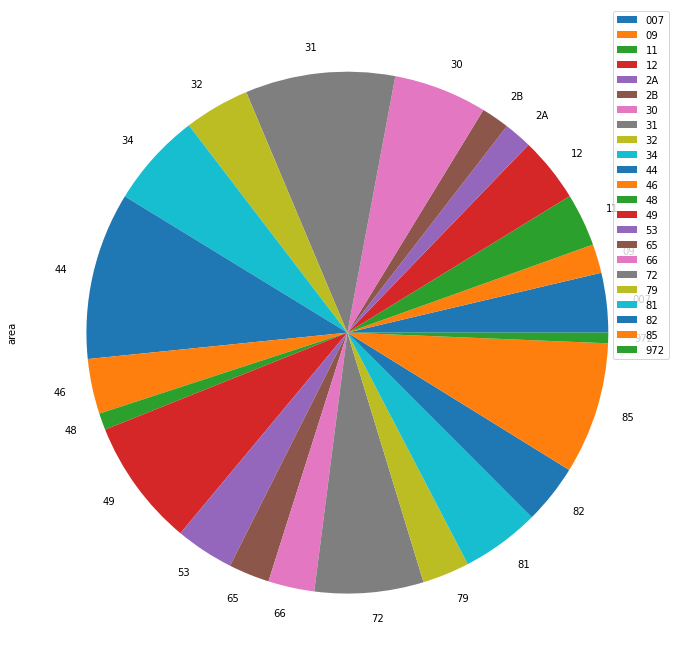

In [99]:
bati_grouped_by_dep_gdf = pd.DataFrame(gdf_bati.groupby(["DEP"]).sum(["area"]))
bati_grouped_by_dep_gdf.plot(kind='pie', y='area', figsize=(12, 12))

In [4]:
with open('/home/ign.fr/skhelifi/data/ocsge-samy/data.json', 'r') as fp:
    data = json.load(fp)

In [6]:
def create_conf_matrix(d):
    
    for k, v in d.items():
        
        shp = v['OCCUPATION_SOL']
        current =  gpd.read_file(shp)
        print(f"columns: {current.columns}")

PATH_TO_MAT_CONF = '/home/ign.fr/skhelifi/data/ocsge-samy'
create_conf_matrix(data)

columns: Index(['ID', 'CODE_CS', 'CODE_US', 'MILLESIME', 'SOURCE', 'OSSATURE',
       'ID_ORIGINE', 'CODE_OR', 'geometry'],
      dtype='object')
columns: Index(['ID', 'CODE_CS', 'CODE_US', 'MILLESIME', 'SOURCE', 'OSSATURE',
       'ID_ORIGINE', 'CODE_OR', 'geometry'],
      dtype='object')
columns: Index(['ID', 'CODE_CS', 'CODE_US', 'MILLESIME', 'SOURCE', 'OSSATURE',
       'ID_ORIGINE', 'CODE_OR', 'geometry'],
      dtype='object')
columns: Index(['ID', 'CODE_CS', 'CODE_US', 'MILLESIME', 'SOURCE', 'OSSATURE',
       'ID_ORIGINE', 'CODE_OR', 'geometry'],
      dtype='object')
columns: Index(['ID', 'CODE_CS', 'CODE_US', 'MILLESIME', 'SOURCE', 'OSSATURE',
       'ID_ORIGINE', 'CODE_OR', 'geometry'],
      dtype='object')
columns: Index(['ID', 'CODE_CS', 'CODE_US', 'MILLESIME', 'SOURCE', 'OSSATURE',
       'ID_ORIGINE', 'CODE_OR', 'geometry'],
      dtype='object')
columns: Index(['ID', 'CODE_CS', 'CODE_US', 'MILLESIME', 'SOURCE', 'OSSATURE',
       'ID_ORIGINE', 'CODE_OR', 'geometry'],
